<a href="https://colab.research.google.com/github/mbr-ctrl/fraud_detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/bank_transactions_data_2.csv')

In [3]:
df = data.copy()

In [6]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [8]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


# **Nettoyage des données**

In [9]:
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [10]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

In [13]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df[numeric_columns]

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70,81,1,5112.21
1,376.24,68,141,1,13758.91
2,126.29,19,56,1,1122.35
3,184.50,26,25,1,8569.06
4,13.45,26,198,1,7429.40
...,...,...,...,...,...
2507,856.21,33,109,1,12690.79
2508,251.54,48,177,1,254.75
2509,28.63,56,146,1,3382.91
2510,185.97,23,19,1,1776.91


In [15]:
categorial_columns = df.select_dtypes(include=['object']).columns
for col in categorial_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [19]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

In [21]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
numeric_data = numeric_data.dropna(axis=1, thresh=len(numeric_data)*0.5)

In [22]:
numeric_data = numeric_data.fillna(numeric_data.median())

# **Analyse Exploratoire des données**

Text(0.5, 1.0, 'Correlation Heatmap (Numeric Columns Only)')

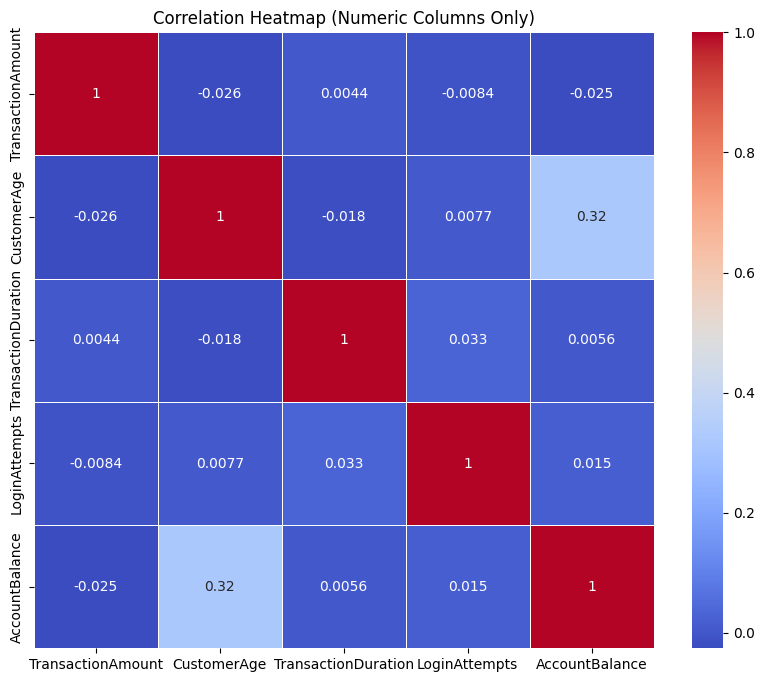

In [25]:
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Columns Only)')

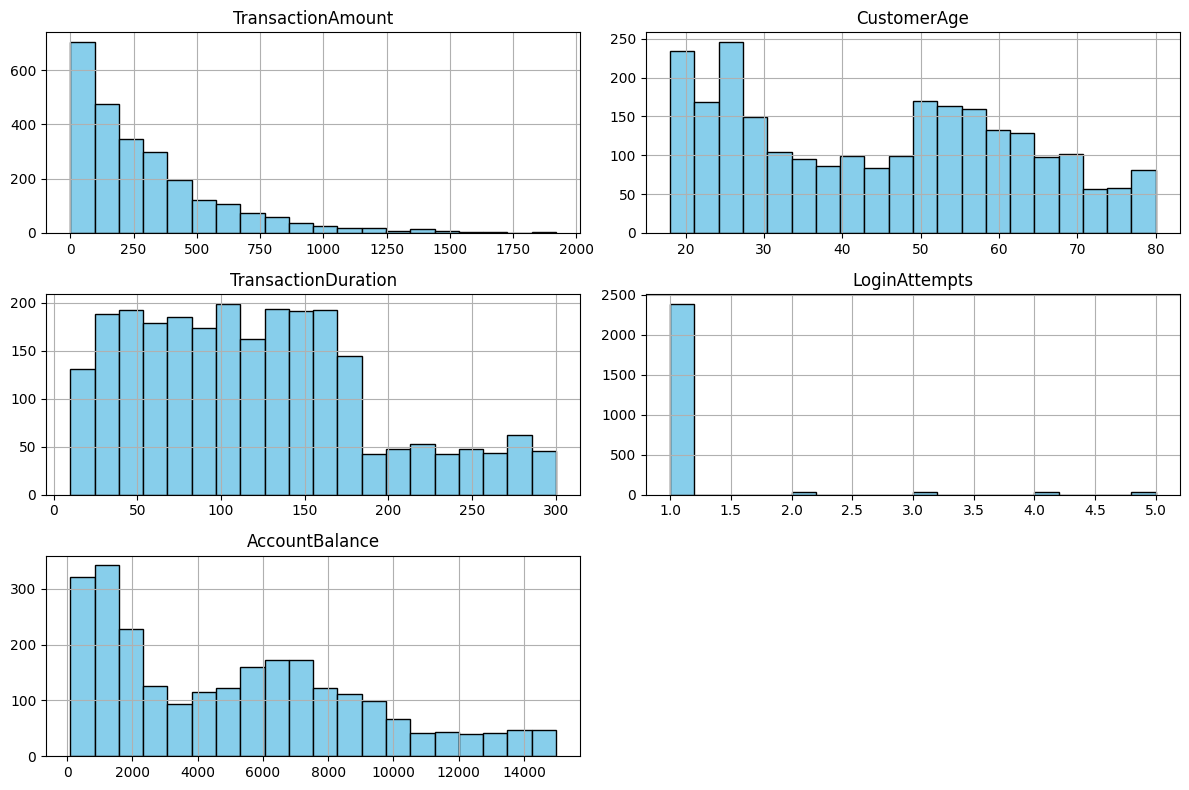

In [27]:
numeric_data.hist(figsize=(12, 8), bins=20, edgecolor='black', color='skyblue')
plt.tight_layout()
plt.show()

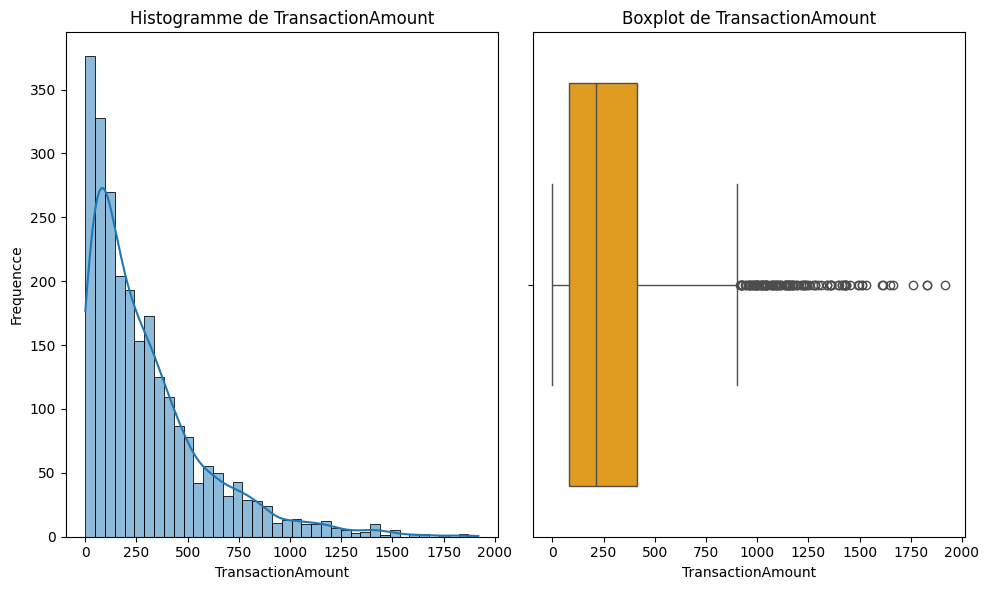

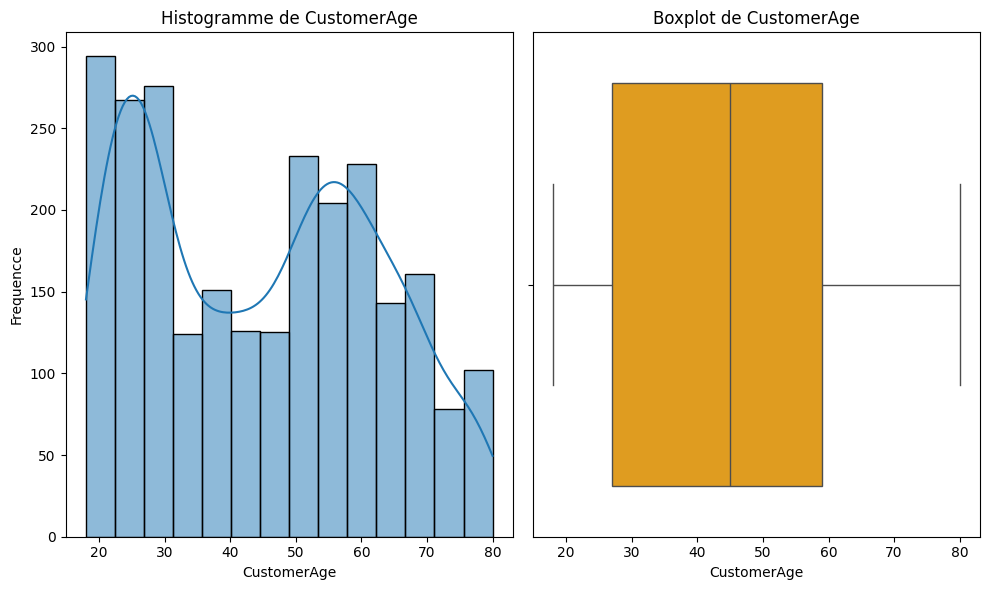

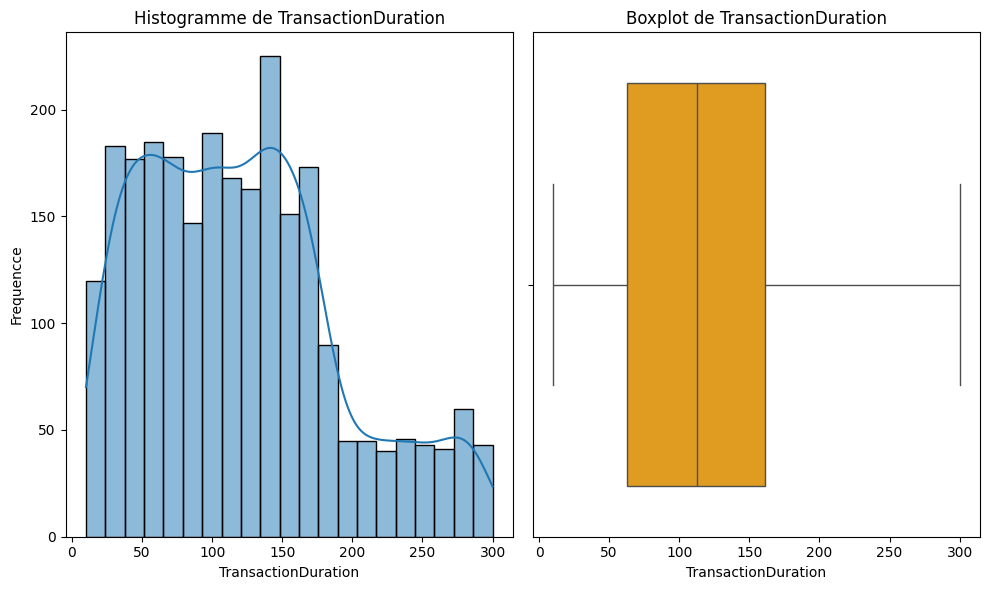

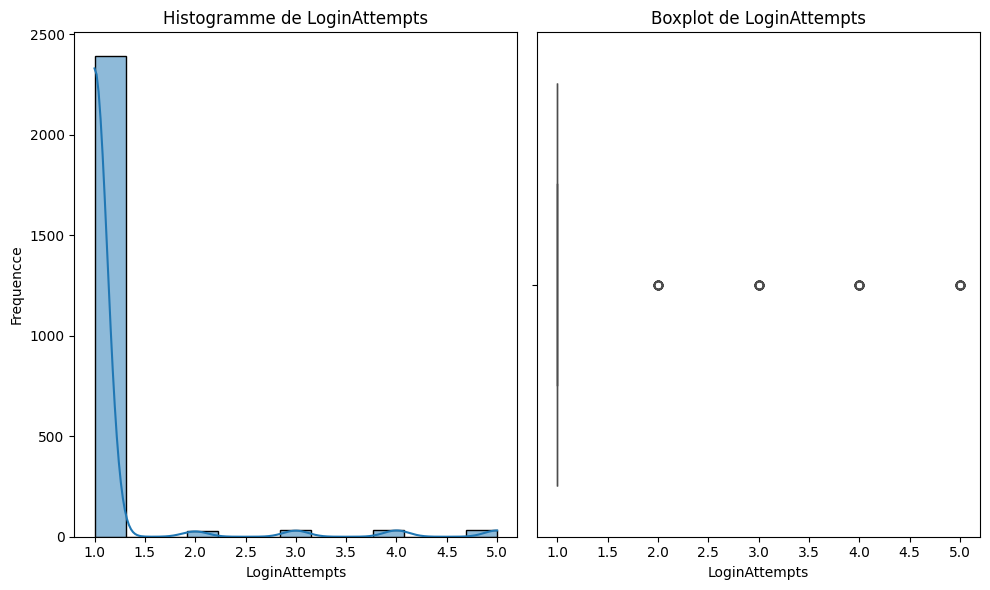

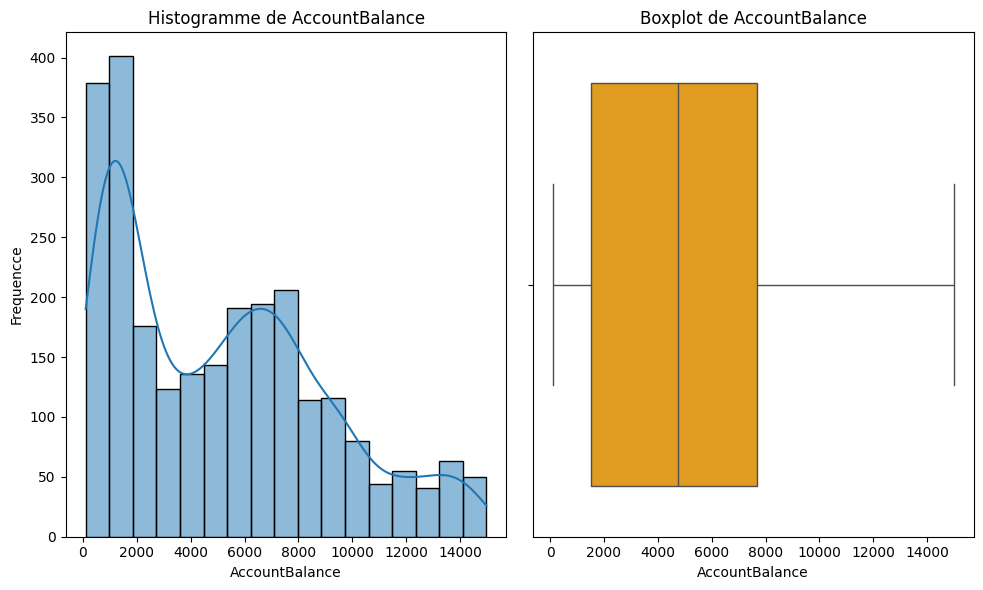

In [32]:
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequencce')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


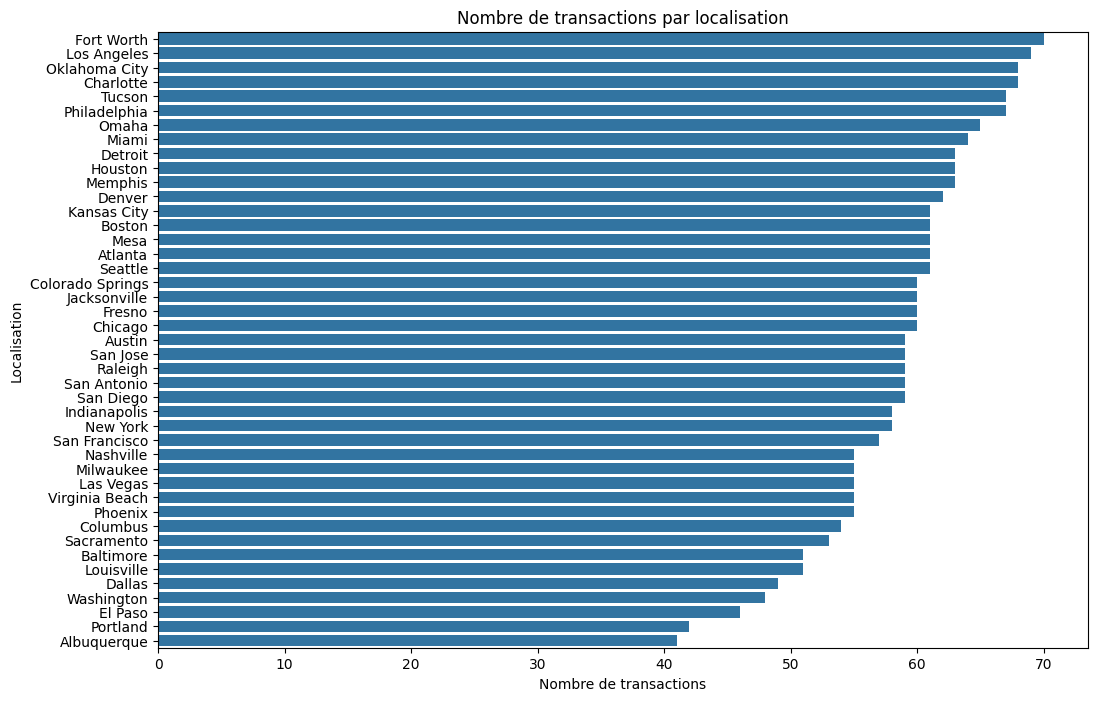

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Location'], order=df['Location'].value_counts().index)
plt.title('Nombre de transactions par localisation')
plt.xlabel('Nombre de transactions')
plt.ylabel('Localisation')
plt.show()

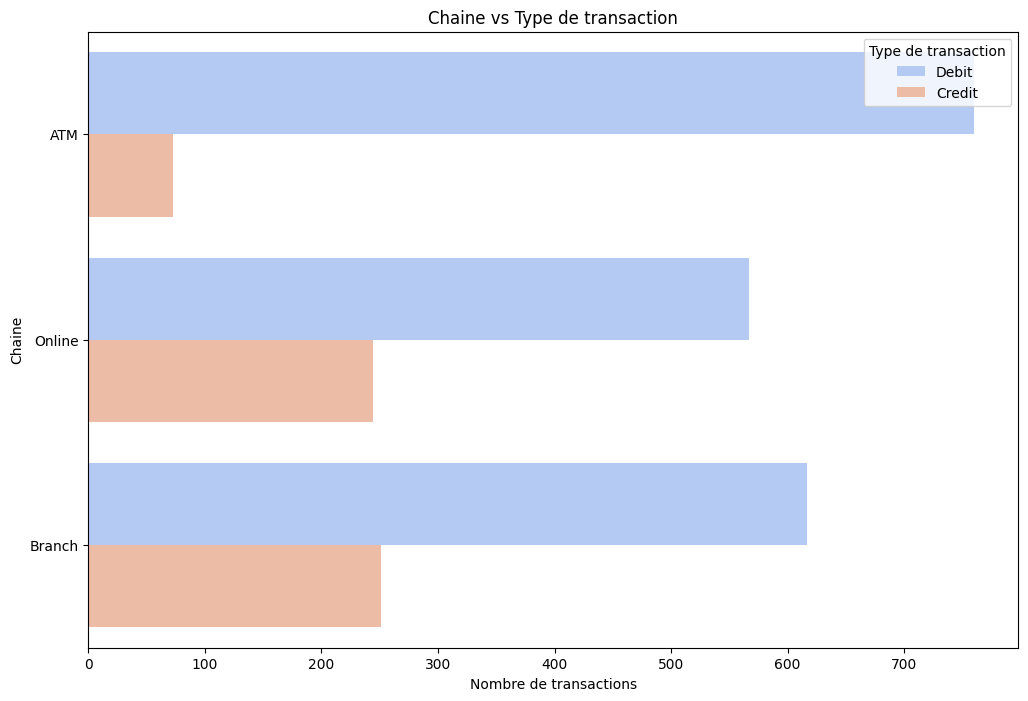

In [38]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Channel'], hue="TransactionType", data=df, palette='coolwarm')
plt.title('Chaine vs Type de transaction')
plt.xlabel('Nombre de transactions')
plt.ylabel('Chaine')
plt.legend(title='Type de transaction', loc='upper right')
plt.show()

In [39]:
df['Channel'].value_counts()

,count
Channel,
Branch,868
ATM,833
Online,811


Text(0, 0.5, '')

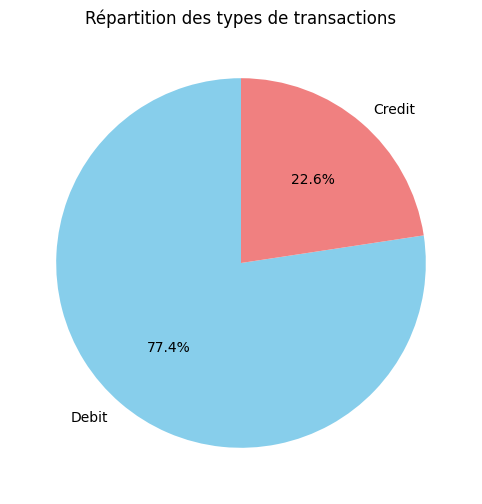

In [41]:
plt.figure(figsize=(8, 6))
df['TransactionType'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Répartition des types de transactions')
plt.ylabel('')

([0, 1, 2, 3],
 [Text(0, 0, 'Doctor'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Retired'),
  Text(3, 0, 'Engineer')])

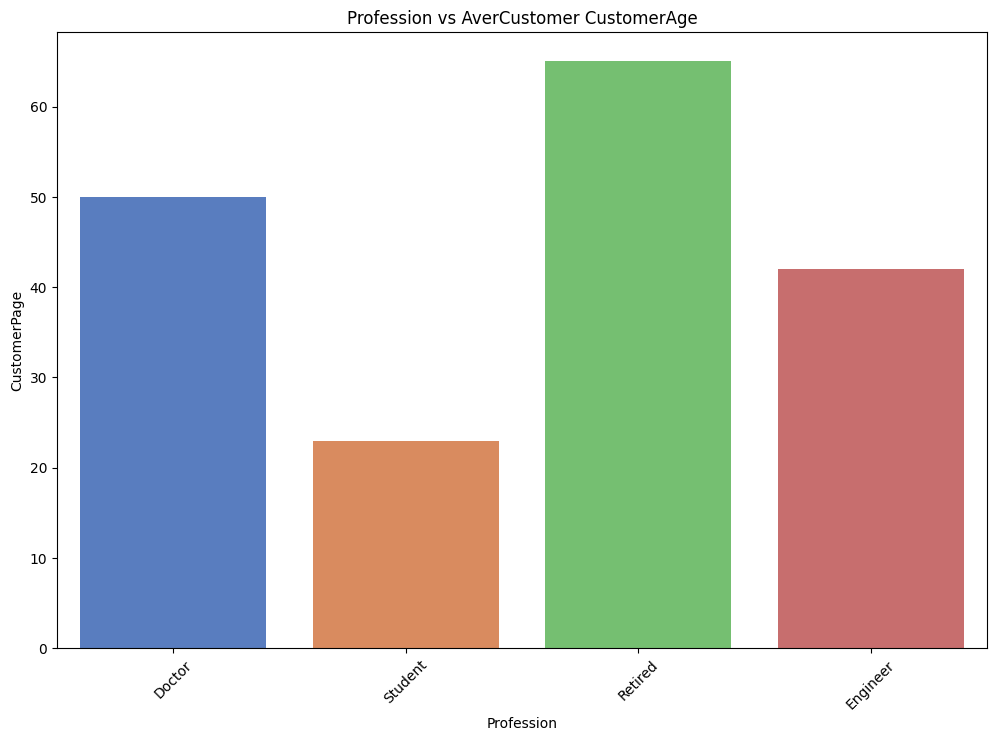

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(x='CustomerOccupation', y='CustomerAge', data=df, estimator='median', palette='muted', ci=None)
plt.title('Profession vs AverCustomer CustomerAge')
plt.xlabel('Profession')
plt.ylabel('CustomerPage')
plt.xticks(rotation=45)

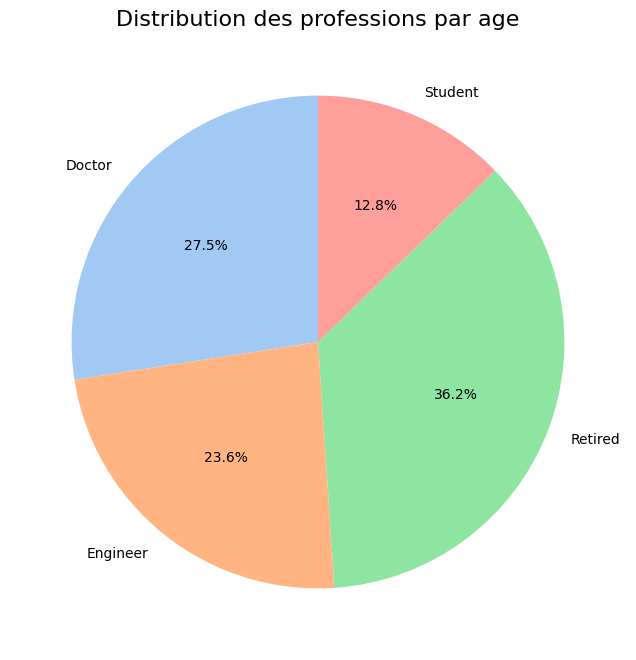

In [48]:
plt.figure(figsize=(8, 8))
df.groupby('CustomerOccupation')['CustomerAge'].mean().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution des professions par age', fontsize=16)
plt.ylabel('')
plt.show()


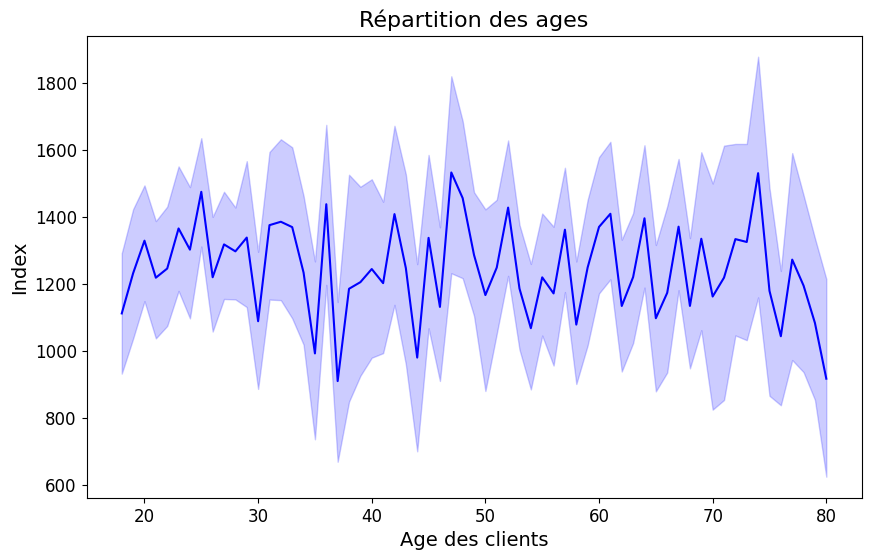

In [49]:
plt.figure(figsize=(10, 6))
sns.lineplot(y=df.index, x=data['CustomerAge'], color='blue')
plt.title('Répartition des ages', fontsize=16)
plt.ylabel('Index', fontsize=14)
plt.xlabel('Age des clients', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()